# Takehome: Expression Trees

Note: this is an "open book" exam. You are free to use your notes, homework solutions, and all of the material uploaded to Canvas. You are not allowed to seek outside help (that includes searching the internet, other literature, or contacting anybody except the instructor).

The goal of this exam is to represent and manipulate mathematical expressions like 1+(2*x-7*sqrt(3)) using expression trees. A formula is represented as a collection of nodes that contain 0, 1, or 2 children (x has no child, sqrt has one child, + has two, etc.). We are supporting the following operators:
```
  + - * / sqrt
```

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
class TreeNode(object):
    """ A node of a binary tree """
    def __init__(self, data, left_child = None, right_child = None):
        self.data = data
        self.left = left_child
        self.right = right_child
    
    def traverse_infix(self, result = None):
        if result == None:
            result = []
            
        if self.left:
            self.left.traverse_infix(result)
            
        result.append(self.data)
        
        if self.right:
            self.right.traverse_infix(result)
            
        return result
    
    def traverse_prefix(self, result = None):
        if result == None:
            result = []
            
        result.append(self.data)   
            
        if self.left:
            self.left.traverse_prefix(result)
            
        if self.right:
            self.right.traverse_prefix(result)
            
        return result
   
    def traverse_postfix(self, result = None):
        if result == None:
            result = []
            
        if self.left:
            self.left.traverse_postfix(result)
            
        if self.right:
            self.right.traverse_postfix(result)
            
        result.append(self.data)
        
        return result
    
    def as_string(self):
        if self.left or self.right:
            print ("(", end="")
        if self.left:
            self.left.as_string()
        print (self.data, end="")
        if self.right:
            self.right.as_string()
        if self.left or self.right:
            print (")", end="")
            
        return ""
 

In [3]:
# create a graphical representation of a binary tree (plot_tree uses plot_node)

def plot_node(node, level = 1, posx = 0, posy = 0):
    
    width = 2000.0 * (0.5**(level))
    plt.text(posx, posy, str(node.data), horizontalalignment='center',fontsize=10)
    
    if node.left:
        px = [posx, posx-width]
        py = [posy-2, posy-15]
        plt.plot(px,py,'b-')
        plot_node(node.left, level+1, posx-width, posy-20)
    
    if node.right:
        plot_node(node.right, level+1, posx+width, posy-20)
        px = [posx, posx+width]
        py = [posy-2, posy-15]
        plt.plot(px,py,'b-')

def plot_tree(node, figsize=(10,6)):
    rcParams['figure.figsize'] = figsize
    fig, ax = plt.subplots()
    ax.axis('off')
    plot_node(node)
    plt.show()


## Question 1
complete the following function that prints the tree one node per row (in prefix order), with children indented two spaces by level. Example output:
```
+
  a
  *  
    b
    ^
      c
      d
```

In [4]:
def print_tree(node, level = 0):
    print (level*'  ', node.data)
    level = level + 1
    if (node.left):
        print_tree(node.left, level)
    if (node.right):
        print_tree(node.right, level)
    

Infix:  ['a']
Infix:  ['c', '^', 'd']
Infix:  ['b', '*', 'c', '^', 'd']
Infix:  ['a', '+', 'b', '*', 'c', '^', 'd']
 +
   a
   *
     b
     ^
       c
       d


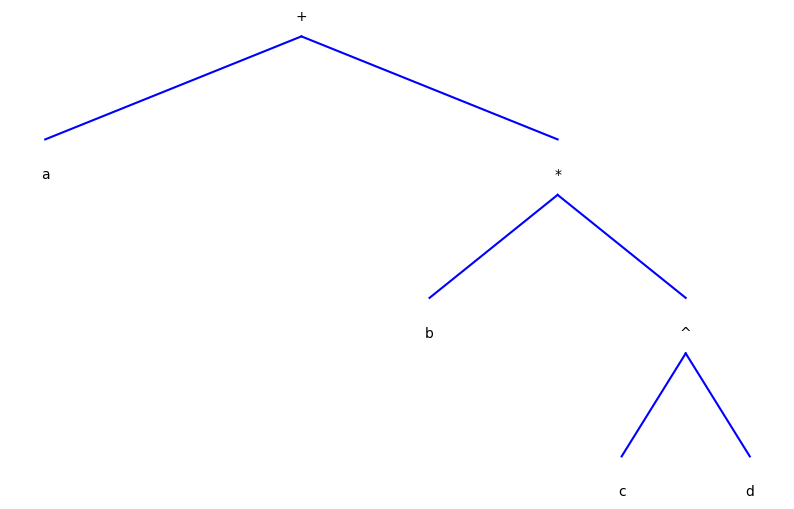

In [5]:
# generate tree for: a + b * c ^ d
a = TreeNode('a')
print ("Infix: ",a.traverse_infix())
b = TreeNode('b')
c = TreeNode('c')
d = TreeNode('d')
factor = TreeNode('^',c,d)
print ("Infix: ",factor.traverse_infix())
term = TreeNode('*',b,factor)
print ("Infix: ",term.traverse_infix())
expr = TreeNode('+',a,term)
print ("Infix: ",expr.traverse_infix())

print_tree(expr)
plot_tree(expr)

## Question 2
Generate the expression tree for ((a+b)*c)^d (parentheses are not included directly but are here to show the order of operations)

Infix ['a', '+', 'b', '*', 'c', '^', 'd']


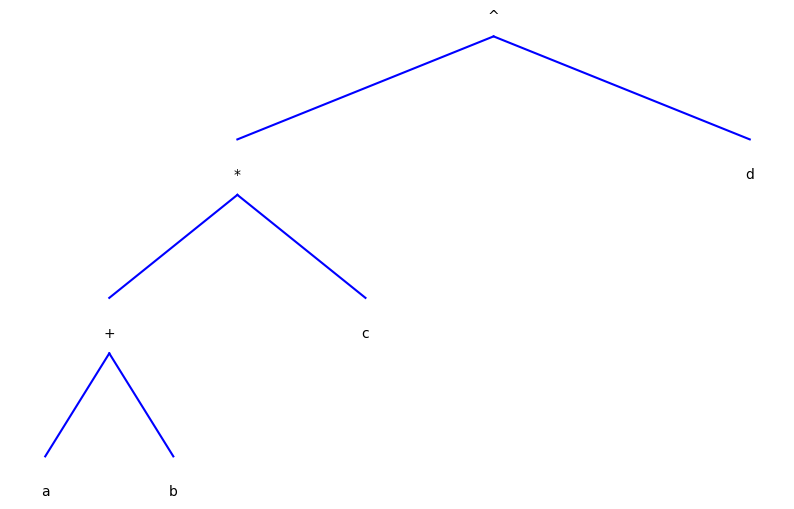

In [6]:
# ((a+b)*c)^d without parentheses
a = TreeNode('a')
b = TreeNode('b')
c = TreeNode('c')
d = TreeNode('d')

first = TreeNode ('+', a, b)
second = TreeNode ('*', first, c)
expr = TreeNode('^', second, d)

print ("Infix",expr.traverse_infix())

plot_tree(expr)

## Question 3: traversal
Implement implement the missing of the three traversal functions inside TreeNode and test them here:

In [7]:
print ("infix:", expr.traverse_infix())
print ("prefix:", expr.traverse_prefix())
print ("postfix:", expr.traverse_postfix())


infix: ['a', '+', 'b', '*', 'c', '^', 'd']
prefix: ['^', '*', '+', 'a', 'b', 'c', 'd']
postfix: ['a', 'b', '+', 'c', '*', 'd', '^']


Now write the as_string() function that returns a string of the expression with parentheses around the arguments of each operator. The output should be
```
  ((((a+b)*c)^d)
```
(it is easy to always add parentheses around nodes, but that would produce (a)+(b) etc., skip them if they only contain a single node (number or letter). You can try to get rid of the outer most parentheses, if you want (not necessary).

In [8]:
print(expr.as_string())

(((a+b)*c)^d)


## Question 4: evaluate an expression tree
if we plug in numbers for the variables a,b,c, and d, we can compute the result when traversing the tree (instead of just printing the nodes). Complete the compute() function that computes the result of a tree recursively and returns the result.

In [9]:
def check_operator(operator):
    if (operator == '+'):
        return True
    elif (operator == '*'):
        return True
    elif (operator == '^'):
        return True
    else:
        return False
    
def calculate(operator, a, b):
    
    if (operator == '+'):
        return (a+b)
    elif (operator == '*'):
        return (a*b)
    elif (operator == '^'):
        return (pow(a,b))
    else:
        return False

# we replace a,b,c,d by numbers:
a = TreeNode(2)
b = TreeNode(3)
c = TreeNode(4)
d = TreeNode(5)

factor = TreeNode('^',c,d)
term = TreeNode('*',b,factor)
expr = TreeNode('+',a,term)

print(expr.as_string())

def compute(node):
    operator = node.data
    left_data = node.left.data
    right_data = node.right.data
    
    if (check_operator(left_data)):
        left_data = compute(node.left)
        
    if (check_operator(right_data)):
        right_data = compute (node.right)

    return (calculate(operator, left_data, right_data))
    
print (compute(expr))

(2+(3*(4^5)))
3074


## Question 5: parse reverse polish notation

If I give you an array of subexpressions in prefix (polish) notation, for example as
generated from traverse_prefix(), can you create an expression tree from it?




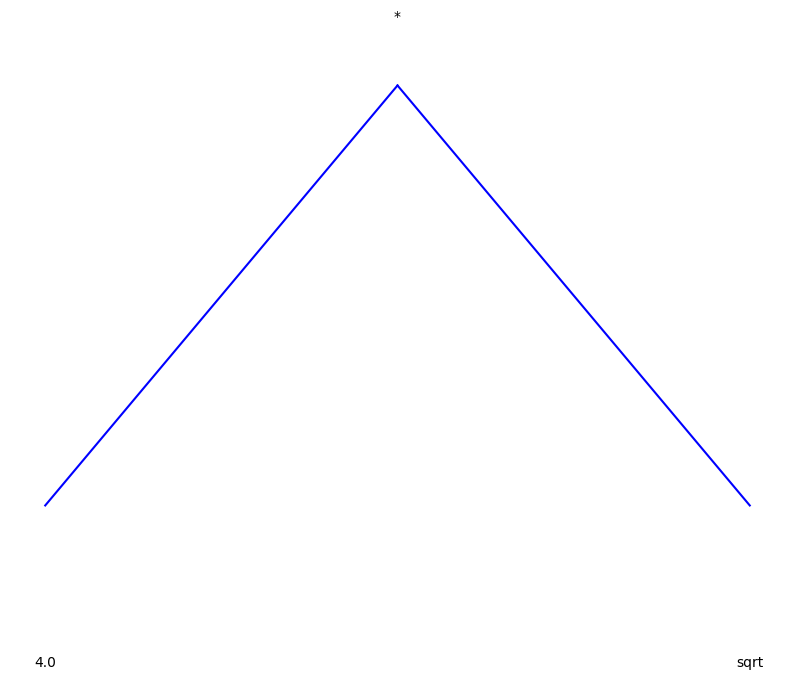

['*', 4.0, 'sqrt']
(4.0*sqrt)


In [22]:
def check_operator(operator):
    if (operator == '+'):
        return True
    elif (operator == '-'):
        return True
    elif (operator == '*'):
        return True
    elif (operator == '/'):
        return True
    elif (operator == '^'):
        return True
    elif (operator == 'sqrt'):
        return True
    else:
        return False

def from_polish_notation(test1):
    operators = ['+', '-', '*', '/', 'sqrt']
    stack = []
    last_inserted_index = 0
    
    for index, char in enumerate(test1):
        if not stack:
            stack.append(TreeNode(test1[0]))
            
        elif stack[last_inserted_index].data in operators:
            stack[last_inserted_index].left = TreeNode(test1[index])
            stack.append(stack[last_inserted_index].left)
            last_inserted_index = index
            
        else:
            for curr_index in range(last_inserted_index, -1, -1):
                if not stack[curr_index].right and stack[curr_index].data in operators and curr_index != last_inserted_index:
                    stack[curr_index].right = TreeNode(test[index])
                    stack.append(stack[curr_index].right)
                    last_inserted_index = curr_index
                    break
                   
    return stack[0]      



test = ['*','x','sqrt',4.0]
expr = from_polish_notation(test)
plot_tree(expr)
print(expr.traverse_prefix())
print(expr.as_string())

In [11]:
# Here are a few other examples:
examples = [
        [42.0],
        ['-',2.5,1.0],
        ['+',1.0,'*',2.0,3.0],
        ['+','*',1.5,2.0,'/',4.0,2.0],
        ['+','*',3.0,'sqrt','x','*','sqrt','-','x',0.0, 4.0],
    ]

for example in examples:
    print("input:", example)
    expr = from_polish_notation(example)
    print(expr.traverse_prefix())    

input: [42.0]
[42.0]
input: ['-', 2.5, 1.0]
['-', 2.5, 1.0]
input: ['+', 1.0, '*', 2.0, 3.0]
['+', 2.0, '*', 3.0]
input: ['+', '*', 1.5, 2.0, '/', 4.0, 2.0]
['+', '*', '/', 4.0, 2.0, 2.0]
input: ['+', '*', 3.0, 'sqrt', 'x', '*', 'sqrt', '-', 'x', 0.0, 4.0]
['+', '*', 'x', 'sqrt', 'sqrt', '-', 4.0, 0.0, '*']
